# Income Prediction Model - Complete Analysis

This notebook demonstrates our **custom Logistic Regression implementation** with mathematical transparency.

**Key Features:**
- Custom gradient descent implementation
- Clear mathematical operations (sigmoid, log loss, gradients)
- Pre-split train/validation data for reproducibility

In [12]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from utils import load_model

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


## 1. Load Pre-Split Data and Model

We use pre-split data to ensure reproducibility and fair evaluation.

In [13]:
# Load the pre-split data
train_df = pd.read_csv('../data/train_split.csv')
val_df = pd.read_csv('../data/val_split.csv')

X_train = train_df.drop(columns=["income_>50K"])
y_train = train_df["income_>50K"]

X_val = val_df.drop(columns=["income_>50K"])
y_val = val_df["income_>50K"]

# Load trained model
model = load_model()

# Make predictions
preprocessor = model.named_steps['preprocess']
logreg = model.named_steps['logreg']

X_val_processed = preprocessor.transform(X_val)
y_pred = logreg.predict(X_val_processed)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print("✓ Data and model loaded successfully!")

Training samples: 35165
Validation samples: 8792
✓ Data and model loaded successfully!


## 2. Custom Logistic Regression - Training Curve

Our implementation uses gradient descent. Let's visualize the learning process.

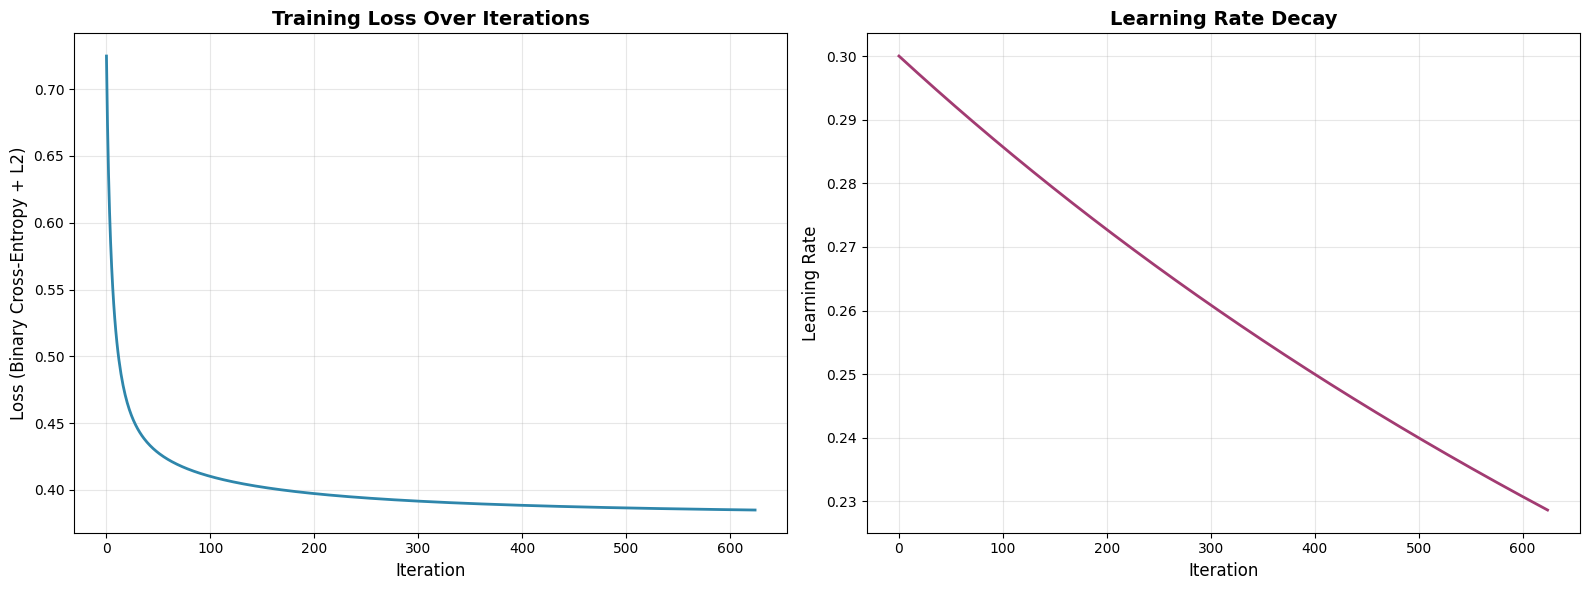

Initial loss: 0.7248
Final loss: 0.3850
Total iterations: 625
Loss reduction: 46.88%


In [14]:
# Plot training loss curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Loss curve
ax1.plot(logreg.losses, linewidth=2, color='#2E86AB')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Loss (Binary Cross-Entropy + L2)', fontsize=12)
ax1.set_title('Training Loss Over Iterations', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Learning rate decay curve (if available)
if hasattr(logreg, 'initial_lr') and hasattr(logreg, 'lr_decay'):
    iterations = range(len(logreg.losses))
    learning_rates = [logreg.initial_lr / (1 + logreg.lr_decay * i) for i in iterations]
    ax2.plot(learning_rates, linewidth=2, color='#A23B72')
    ax2.set_xlabel('Iteration', fontsize=12)
    ax2.set_ylabel('Learning Rate', fontsize=12)
    ax2.set_title('Learning Rate Decay', fontsize=14, fontweight='bold')
    ax2.grid(alpha=0.3)
else:
    # Model was trained with old version - show info message
    ax2.text(0.5, 0.5, 'Learning rate decay not available\n(retrain model to see this plot)', 
             ha='center', va='center', fontsize=12, transform=ax2.transAxes)
    ax2.set_title('Learning Rate Decay', fontsize=14, fontweight='bold')
    ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"Initial loss: {logreg.losses[0]:.4f}")
print(f"Final loss: {logreg.losses[-1]:.4f}")
print(f"Total iterations: {len(logreg.losses)}")
print(f"Loss reduction: {((logreg.losses[0] - logreg.losses[-1]) / logreg.losses[0] * 100):.2f}%")

# Check if model needs retraining
if not hasattr(logreg, 'initial_lr'):
    print("\n⚠️  Model was trained with old version. Retrain to see improvements:")
    print("   cd ../src && python train_model.py")

## 3. Model Performance Metrics

In [15]:
# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_val, y_pred),
    "Precision": precision_score(y_val, y_pred),
    "Recall": recall_score(y_val, y_pred),
    "F1 Score": f1_score(y_val, y_pred)
}

# Display metrics
print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
for metric, value in metrics.items():
    print(f"{metric:12s}: {value:.4f}")
print("="*50)

# Create metrics dataframe for visualization
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])
metrics_df

MODEL PERFORMANCE METRICS
Accuracy    : 0.8049
Precision   : 0.5612
Recall      : 0.8474
F1 Score    : 0.6753


,Metric,Score
0,Accuracy,0.804936
1,Precision,0.561221
2,Recall,0.847433
3,F1 Score,0.675251


## 4. Confusion Matrix

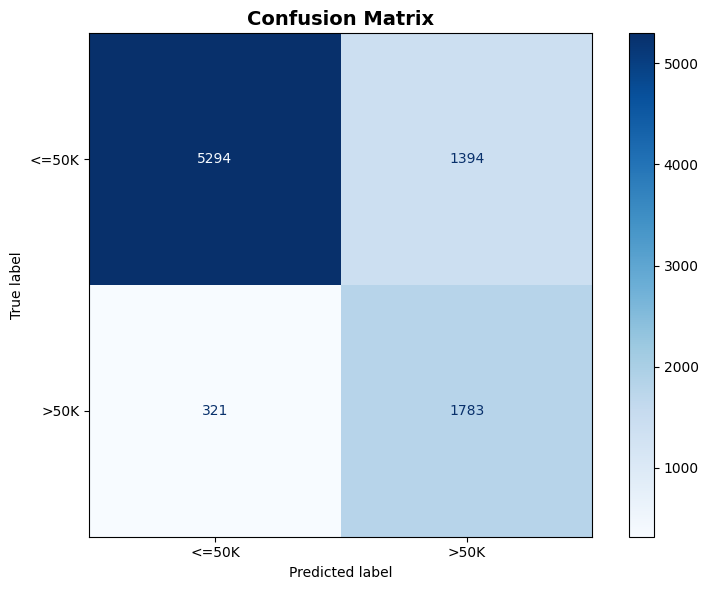


True Negatives:   5294
False Positives:  1394
False Negatives:   321
True Positives:   1783


In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives:  {cm[0][0]:5d}")
print(f"False Positives: {cm[0][1]:5d}")
print(f"False Negatives: {cm[1][0]:5d}")
print(f"True Positives:  {cm[1][1]:5d}")

## 5. Classification Report

In [17]:
print(classification_report(y_val, y_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      6688
        >50K       0.56      0.85      0.68      2104

    accuracy                           0.80      8792
   macro avg       0.75      0.82      0.77      8792
weighted avg       0.85      0.80      0.82      8792



## 6. Metrics Visualization

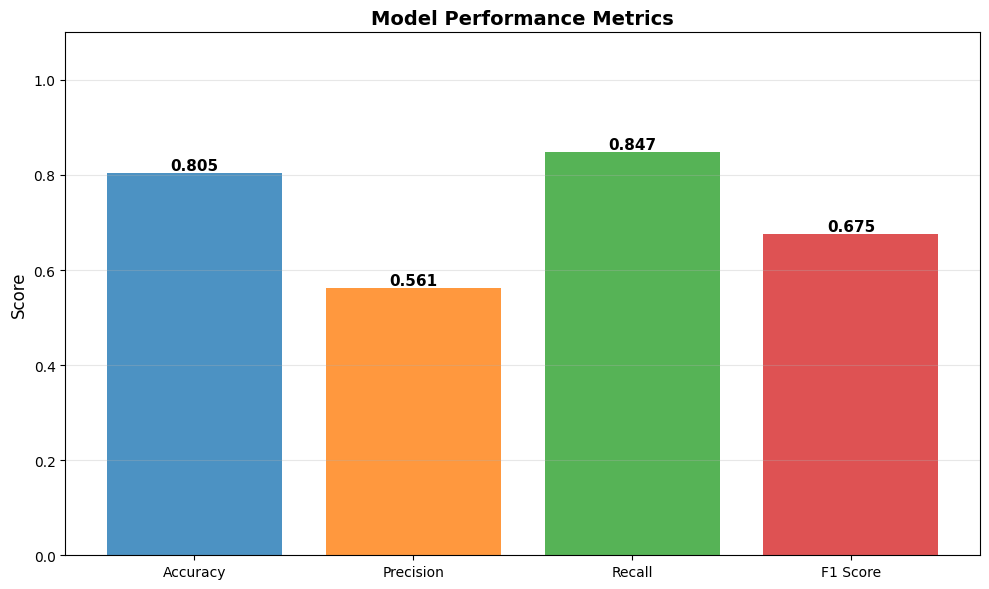

In [18]:
# Bar plot of metrics
fig, ax = plt.subplots(figsize=(10, 6))

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = ax.bar(metric_names, metric_values, 
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], 
              alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:.3f}',
           ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Feature Importance (Weights Analysis)

In logistic regression, the weights represent feature importance.
- **Positive weights** → increase probability of >50K income
- **Negative weights** → decrease probability of >50K income

In [19]:
# Extract feature weights from our custom model
preprocessor = model.named_steps['preprocess']
logreg = model.named_steps['logreg']

# Get feature names
feature_names = []

# Numeric features
numeric_features = preprocessor.transformers_[0][2]
feature_names.extend(numeric_features)

# Categorical features (one-hot encoded)
cat_encoder = preprocessor.transformers_[1][1].named_steps['encoder']
cat_feature_names = cat_encoder.get_feature_names_out(preprocessor.transformers_[1][2])
feature_names.extend(cat_feature_names)

# Get weights (flatten from column vector)
weights = logreg.weights.flatten()

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights,
    'Abs_Weight': np.abs(weights)
})

importance_df = importance_df.sort_values('Abs_Weight', ascending=False)

print("Top 20 Most Important Features:")
print(importance_df.head(20).to_string(index=False))

Top 20 Most Important Features:
                          Feature    Weight  Abs_Weight
                     capital-gain  1.839598    1.839598
marital-status_Married-civ-spouse  1.180158    1.180158
                relationship_Wife  0.972569    0.972569
     marital-status_Never-married -0.731583    0.731583
           relationship_Own-child -0.717596    0.717596
                  educational-num  0.709081    0.709081
         occupation_Other-service -0.622862    0.622862
       occupation_Exec-managerial  0.577718    0.577718
                    gender_Female -0.530370    0.530370
       occupation_Farming-fishing -0.492642    0.492642
                    workclass_nan -0.450099    0.450099
           relationship_Unmarried -0.449319    0.449319
       workclass_Self-emp-not-inc -0.412003    0.412003
                   hours-per-week  0.397411    0.397411
                              age  0.395731    0.395731
        occupation_Prof-specialty  0.347552    0.347552
     occupation_

## 8. Feature Weight Visualization

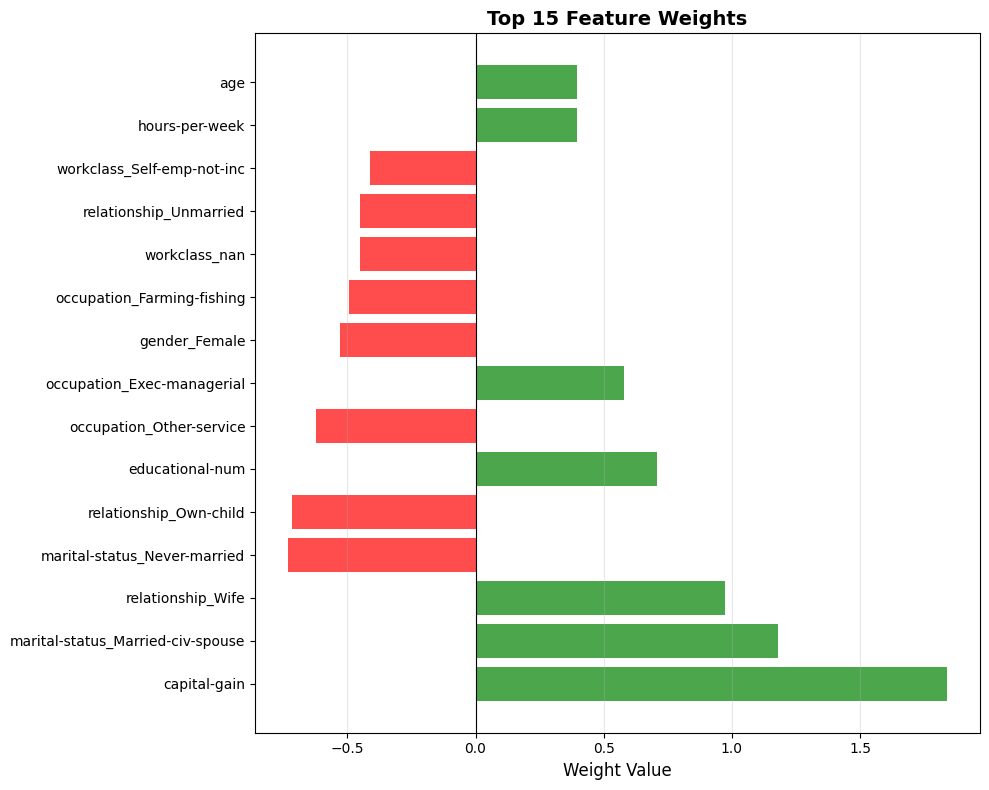

In [20]:
# Plot top 15 features
top_n = 15
top_features = importance_df.head(top_n)

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['green' if x > 0 else 'red' for x in top_features['Weight']]

ax.barh(range(len(top_features)), top_features['Weight'], color=colors, alpha=0.7)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Weight Value', fontsize=12)
ax.set_title(f'Top {top_n} Feature Weights', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Sigmoid Function Visualization

The sigmoid function σ(z) = 1/(1 + e^(-z)) transforms linear predictions into probabilities.
Let's visualize both the mathematical function and how our model's predictions are distributed.

NameError: name 'sigmoidmoid_values' is not defined

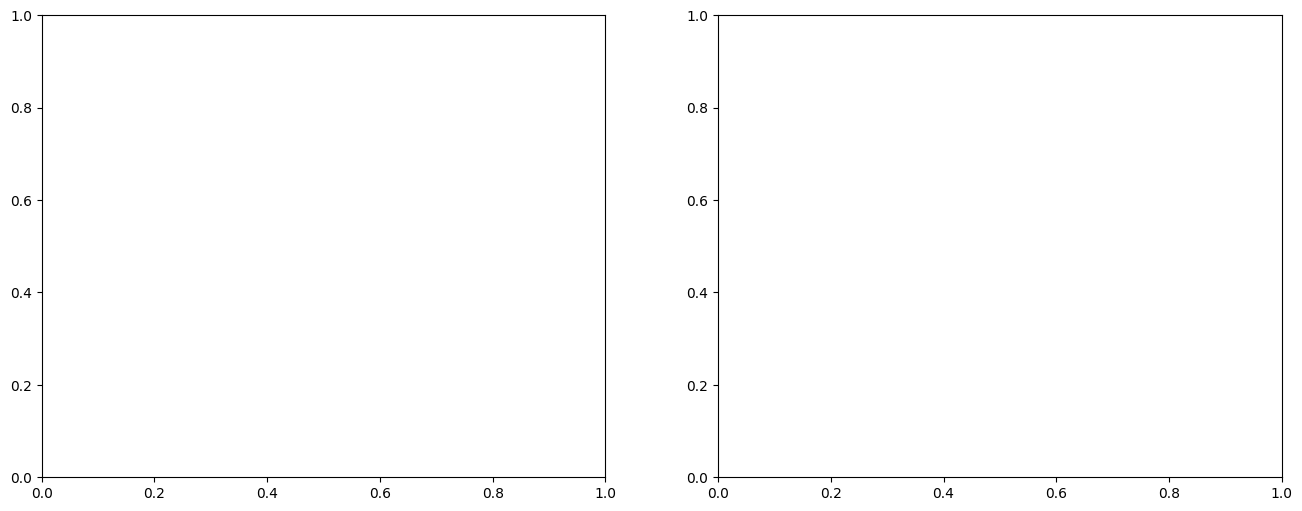

In [ ]:
import matplotlib.pyplot as plt

# Create visualization with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- LEFT PLOT: Sigmoid Function ---
z_range = np.linspace(-10, 10, 200)
sigmoid_values = logreg.sigmoid(z_range)

ax1.plot(z_range, sigmoid_values, linewidth=3, color='#2E86AB', label='σ(z) = 1/(1+e^(-z))')
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Decision Boundary (0.5)')
ax1.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.fill_between(z_range, 0, sigmoid_values, where=(sigmoid_values >= 0.5), 
                  alpha=0.2, color='green', label='Predict: >50K')
ax1.fill_between(z_range, 0, sigmoid_values, where=(sigmoid_values < 0.5), 
                  alpha=0.2, color='red', label='Predict: ≤50K')

ax1.set_xlabel('z = w^T x + b (Linear Combination)', fontsize=12)
ax1.set_ylabel('σ(z) = P(income > 50K)', fontsize=12)
ax1.set_title('Sigmoid Activation Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.set_ylim([-0.05, 1.05])

# Add annotation
ax1.annotate('σ(0) = 0.5', xy=(0, 0.5), xytext=(2, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')

# --- RIGHT PLOT: Model Predictions Distribution ---
y_proba = logreg.predict_proba(X_val_processed)[:, 1]

# Separate by actual class
proba_class0 = y_proba[y_val == 0]
proba_class1 = y_proba[y_val == 1]

ax2.hist(proba_class0, bins=50, alpha=0.6, color='red', label='Actual: ≤50K', edgecolor='black')
ax2.hist(proba_class1, bins=50, alpha=0.6, color='green', label='Actual: >50K', edgecolor='black')
ax2.axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Decision Threshold')

ax2.set_xlabel('Predicted Probability P(income > 50K)', fontsize=12)
ax2.set_ylabel('Number of Samples', fontsize=12)
ax2.set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print statistics
print("="*60)
print("PREDICTION PROBABILITY STATISTICS")
print("="*60)
print(f"\nFor actual ≤50K samples:")
print(f"  Mean probability: {proba_class0.mean():.4f}")
print(f"  Median probability: {np.median(proba_class0):.4f}")
print(f"  Std deviation: {proba_class0.std():.4f}")

print(f"\nFor actual >50K samples:")
print(f"  Mean probability: {proba_class1.mean():.4f}")
print(f"  Median probability: {np.median(proba_class1):.4f}")
print(f"  Std deviation: {proba_class1.std():.4f}")

print(f"\nSeparation quality:")
print(f"  Difference in means: {abs(proba_class1.mean() - proba_class0.mean()):.4f}")
print("="*60)

## 10. Interpretation

- **Green bars**: Features that increase P(income > 50K)
- **Red bars**: Features that decrease P(income > 50K)
- Weight magnitude indicates feature importance

## 10. Threshold Optimization

The default threshold of 0.5 may not be optimal for imbalanced datasets.
Let's find the best threshold to maximize F1 score.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Test different thresholds
thresholds = np.linspace(0.1, 0.9, 81)
y_proba = logreg.predict_proba(X_val_processed)[:, 1]

f1_scores = []
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_val, y_pred_thresh))
    precision_scores.append(precision_score(y_val, y_pred_thresh))
    recall_scores.append(recall_score(y_val, y_pred_thresh))

# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(thresholds, f1_scores, linewidth=2, label='F1 Score', color='#2E86AB')
ax.plot(thresholds, precision_scores, linewidth=2, label='Precision', color='#A23B72', linestyle='--')
ax.plot(thresholds, recall_scores, linewidth=2, label='Recall', color='#F18F01', linestyle='--')

ax.axvline(x=optimal_threshold, color='red', linestyle=':', linewidth=2, 
           label=f'Optimal Threshold = {optimal_threshold:.3f}')
ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='Default (0.5)')

ax.set_xlabel('Decision Threshold', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Threshold Optimization for Best F1 Score', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print(f"Max F1 score: {f1_scores[optimal_idx]:.4f}")
print(f"\nAt optimal threshold:")
print(f"  Precision: {precision_scores[optimal_idx]:.4f}")
print(f"  Recall:    {recall_scores[optimal_idx]:.4f}")

# Compare with default threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(f"\nImprovement over default (0.5):")
print(f"  F1:        {f1_score(y_val, y_pred_optimal) - f1_score(y_val, y_pred):.4f}")
print(f"  Precision: {precision_score(y_val, y_pred_optimal) - precision_score(y_val, y_pred):.4f}")
print(f"  Recall:    {recall_score(y_val, y_pred_optimal) - recall_score(y_val, y_pred):.4f}")

## 11. Interpretation

- **Green bars**: Features that increase P(income > 50K)
- **Red bars**: Features that decrease P(income > 50K)
- Weight magnitude indicates feature importance